# Iris Data Prediction using Decision Tree Algorithm

In [68]:
#Importing multiple library to read,analysed and visualized the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
cd "F:\Knowledge\ML\courses_ML\codes\iris_dataset"

F:\Knowledge\ML\courses_ML\codes\iris_dataset


In [70]:
#Reading the Iris.csv file 

Iris_data = pd.read_csv('Iris.csv')

In [71]:
#Checking top 10 records of Dataset..
Iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [72]:
#Describe function gives the basic numerical info about data for each numeric feature..

Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [73]:
#Data points count value for each class labels..

Iris_data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Visualizing Iris Data

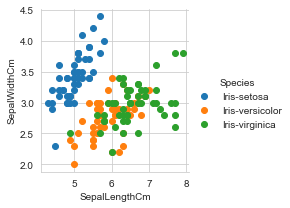

In [74]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(Iris_data, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

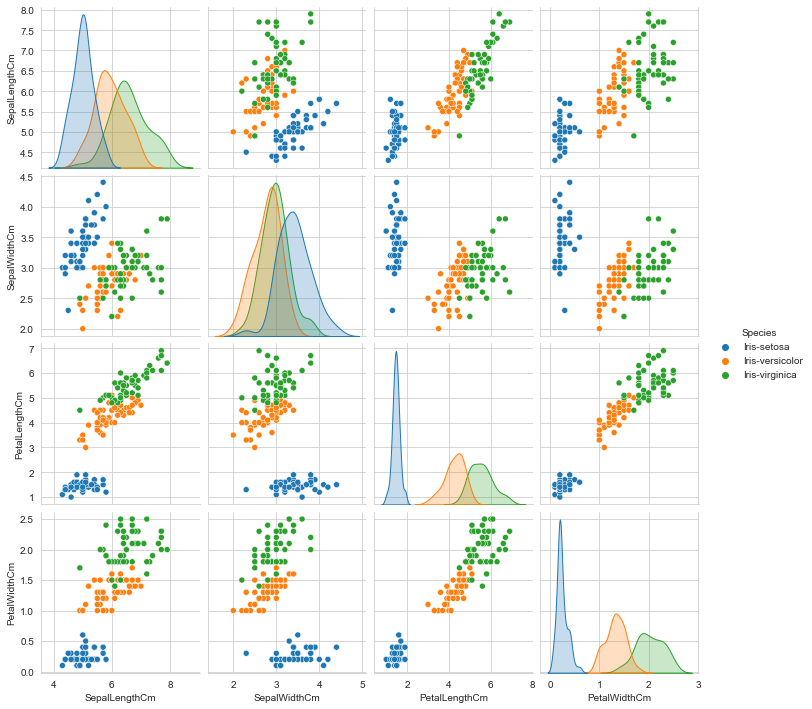

In [75]:
#Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(Iris_data.drop(['Id'],axis=1), hue='Species')
plt.show()

# Building Classification Model

In [76]:
'''Imporing few library for create Decision tree classifier and visualizing the tree structure'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [77]:

'''Here we separating independent varibles or target varibles from Iris dataset'''


X = Iris_data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = Iris_data['Species']

In [78]:

#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=4)


In [79]:
# print the shapes of the new X objects
print(Xtrain.shape)
print(Xtest.shape)

(105, 4)
(45, 4)


In [80]:
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

[Text(167.4, 195.696, 'X[2] <= 2.45\ngini = 0.661\nsamples = 105\nvalue = [29, 40, 36]'),
 Text(141.64615384615385, 152.208, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(193.15384615384616, 152.208, 'X[3] <= 1.75\ngini = 0.499\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(103.01538461538462, 108.72, 'X[2] <= 4.95\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(51.50769230769231, 65.232, 'X[3] <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(25.753846153846155, 21.744, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(77.26153846153846, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 65.232, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(128.76923076923077, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(283.2923076923077, 108.72, 'X[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(257

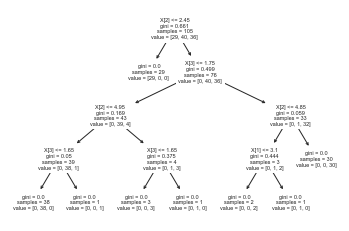

In [81]:
#Visualized the Tree which is formed on train dataset

tree.plot_tree(Iris_clf)

We can also export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with conda **install python-graphviz**

#https://graphviz.org/download/
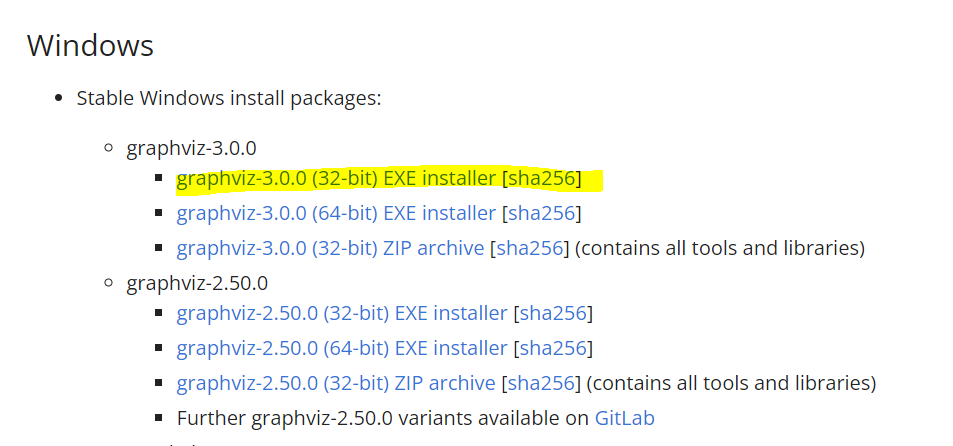

In [82]:
import os
os.environ["PATH"] += os.pathsep +r'C:\Users\hp\Downloads\Graphviz\bin'

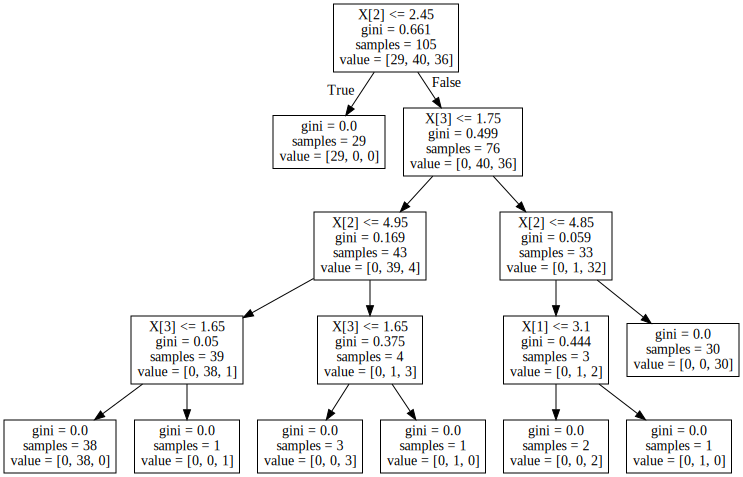

In [83]:
#Final Decision tree build for deploying in real world cases....

dot_data = tree.export_graphviz(Iris_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [84]:
#Checking the performance of model on Actual Test data...
from sklearn.metrics import accuracy_score
YT_Fhat = Iris_clf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')


Model Accuracy Score on totally unseen data(Xtest) is: 97.77777777777777 %


In [85]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(Iris_clf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']
